<a href="https://colab.research.google.com/github/OmarIraqy/Circus-of-Plates/blob/master/Assignment3_Bagging_Boosting/Explanatory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/your_data.csv')
del df['Unnamed: 0']

In [16]:
# Feature Engineering
numerical_features=['systolic','fasting blood sugar','AST','Gtp','hemoglobin','serum creatinine','age','height(cm)','triglyceride']

In [22]:
print(len(df))
df.head()

159256


systolic  fasting blood sugar       AST  dental caries       Gtp  \
0  0.981702            -0.283930 -0.371570              0 -0.295342   
1  1.845852             3.173413  0.156700              1  0.025124   
2 -0.353802            -1.262423  0.156700              0  0.537870   
3  0.667465            -0.479628 -0.582878              1 -0.199202   
4 -0.118125            -0.479628 -0.688532              0 -0.615808   

   hemoglobin  serum creatinine       age  height(cm)  triglyceride  smoking  
0    1.189928          0.597927  0.902985   -0.030268      2.604429        1  
1    0.980315          1.155511  2.169636   -0.030268     -1.097105        0  
2    1.818767         -0.517239 -2.052535    0.536694      1.048274        1  
3    0.770702          0.597927 -0.785883    1.670617      1.138923        0  
4    0.421347         -0.517239 -1.208100   -0.030268     -0.613639        1

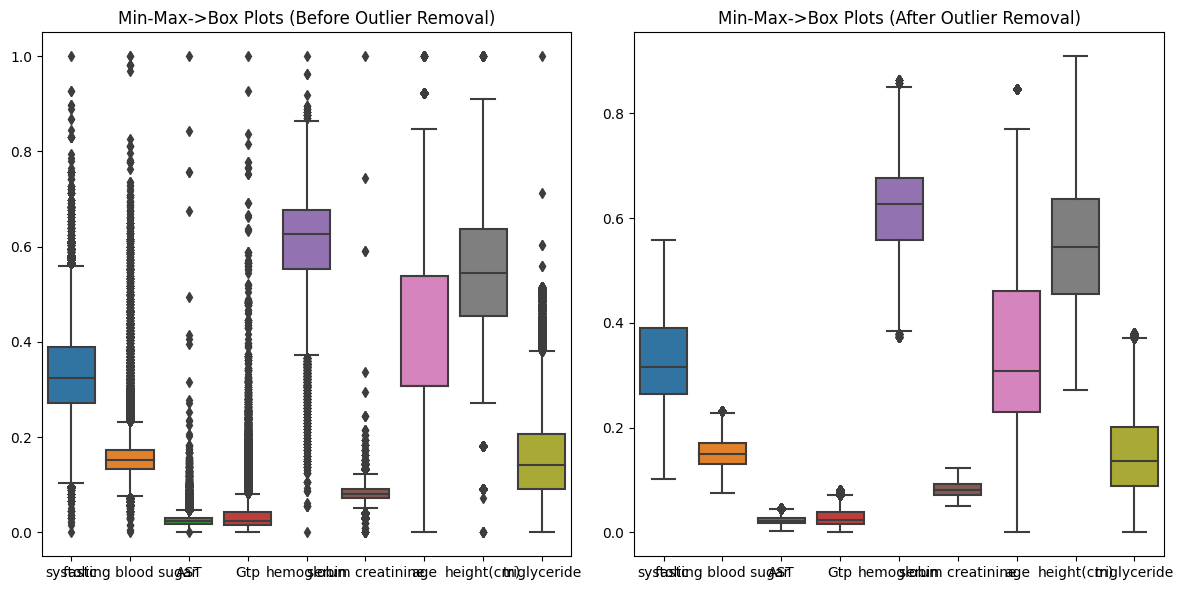

In [10]:
# Normalization with miin max then remove outliers
df1=df
# Min-Max Scaling
scaler = MinMaxScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

# Outlier Removal
plt.figure(figsize=(12, 6))

# Original box plots
plt.subplot(1, 2, 1)
sns.boxplot(data=df1[numerical_features])
plt.title('Min-Max->Box Plots (Before Outlier Removal)')

# Calculate the IQR for numerical features
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

# Create a mask for outliers
outliers_mask = ~((df1[numerical_features] < (Q1 - iqr_multiplier * IQR)) | (df1[numerical_features] > (Q3 + iqr_multiplier * IQR)))

# Apply the mask to the DataFrame
df_no_outliers1 = df1[outliers_mask.all(axis=1)]

# Box plots after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers1[numerical_features])
plt.title('Min-Max->Box Plots (After Outlier Removal)')

plt.tight_layout()
plt.show()

**Outliers Removal**

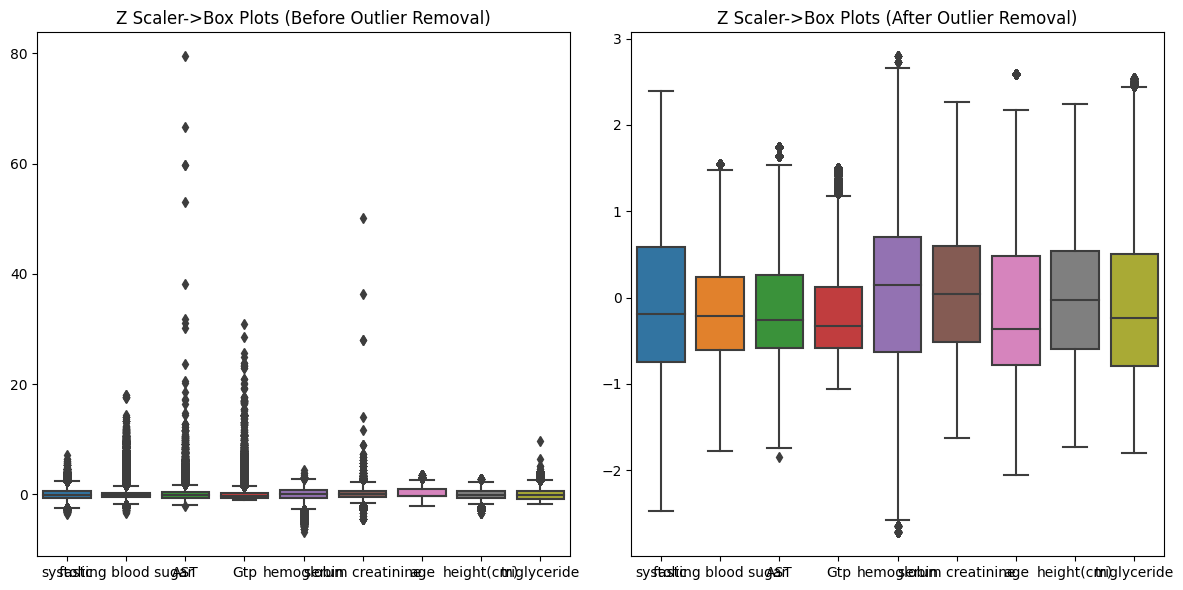

In [11]:

#Normalization with Z-Score Standardization then remove outliers
df2=df
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
# Outlier Removal
plt.figure(figsize=(12, 6))

# Original box plots
plt.subplot(1, 2, 1)
sns.boxplot(data=df2[numerical_features])
plt.title('Z Scaler->Box Plots (Before Outlier Removal)')

# Calculate the IQR for numerical features
Q1 = df2[numerical_features].quantile(0.25)
Q3 = df2[numerical_features].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

# Create a mask for outliers
outliers_mask = ~((df2[numerical_features] < (Q1 - iqr_multiplier * IQR)) | (df2[numerical_features] > (Q3 + iqr_multiplier * IQR)))

# Apply the mask to the DataFrame
df_no_outliers2 = df2[outliers_mask.all(axis=1)]

# Box plots after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers2[numerical_features])
plt.title('Z Scaler->Box Plots (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [21]:
print(len(df_no_outliers2))
df_no_outliers2.head(5)


126591


systolic  fasting blood sugar       AST  dental caries       Gtp  \
2 -0.353802            -1.262423  0.156700              0  0.537870   
3  0.667465            -0.479628 -0.582878              1 -0.199202   
4 -0.118125            -0.479628 -0.688532              0 -0.615808   
6  2.160088            -0.936258 -0.899840              0 -0.647854   
7  1.138820             0.107468 -1.005494              0 -0.647854   

   hemoglobin  serum creatinine       age  height(cm)  triglyceride  smoking  
2    1.818767         -0.517239 -2.052535    0.536694      1.048274        1  
3    0.770702          0.597927 -0.785883    1.670617      1.138923        0  
4    0.421347         -0.517239 -1.208100   -0.030268     -0.613639        1  
6   -1.255558         -1.074823  0.058551   -0.597229      0.383508        0  
7   -0.207493         -1.074823  0.902985   -1.164191      0.564808        0

count    126591.000000
mean         -0.056003
std           0.938832
min          -2.474897
25%          -0.746598
50%          -0.196684
75%           0.588906
max           2.395765
Name: systolic, dtype: float64


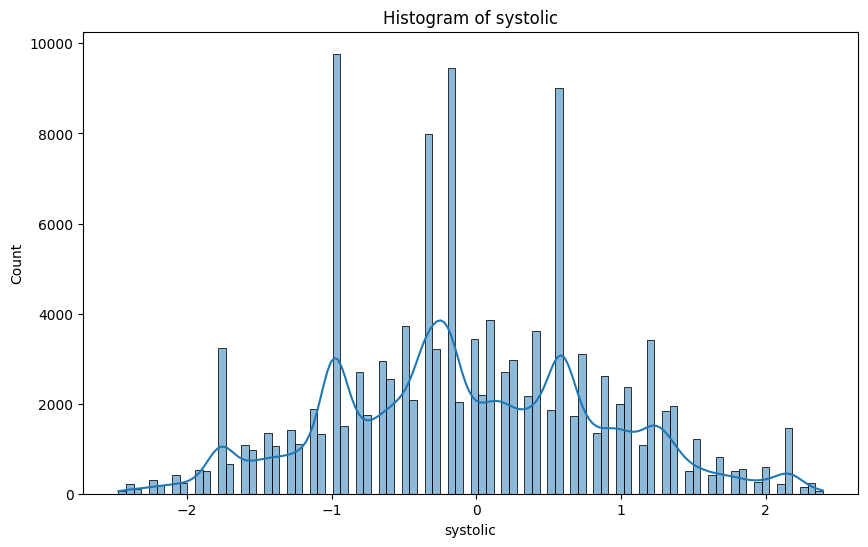

count    126591.000000
mean         -0.163800
std           0.628573
min          -1.784286
25%          -0.610094
50%          -0.218697
75%           0.237934
max           1.542591
Name: fasting blood sugar, dtype: float64


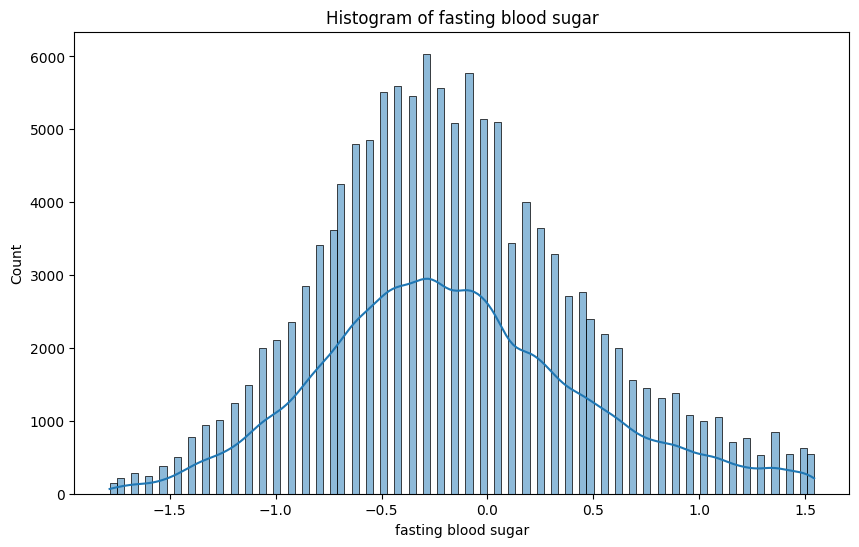

count    126591.000000
mean         -0.143002
std           0.663816
min          -1.850727
25%          -0.582878
50%          -0.265916
75%           0.262355
max           1.741511
Name: AST, dtype: float64


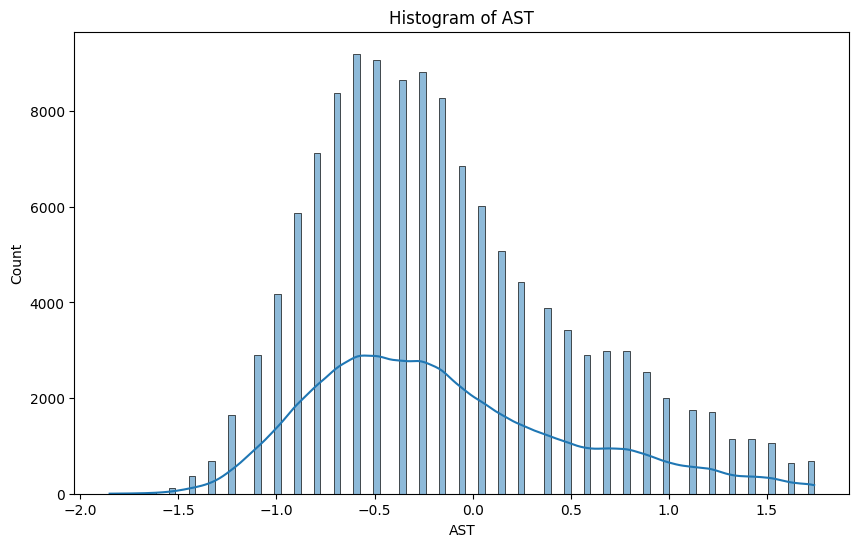

count    126591.000000
mean         -0.177208
std           0.532785
min          -1.064460
25%          -0.583761
50%          -0.327388
75%           0.121264
max           1.499269
Name: Gtp, dtype: float64


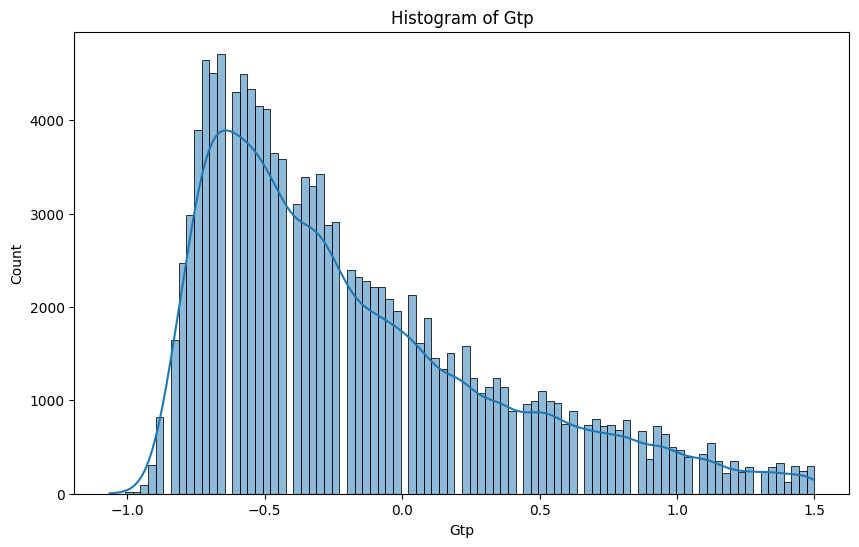

count    126591.000000
mean          0.026509
std           0.922639
min          -2.722849
25%          -0.626719
50%           0.141862
75%           0.700831
max           2.796961
Name: hemoglobin, dtype: float64


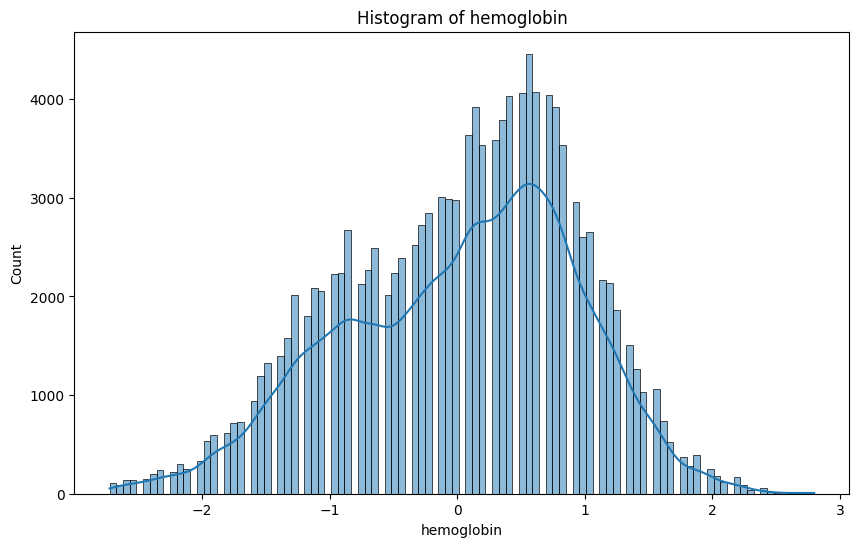

count    126591.000000
mean          0.024672
std           0.906267
min          -1.632406
25%          -0.517239
50%           0.040344
75%           0.597927
max           2.270677
Name: serum creatinine, dtype: float64


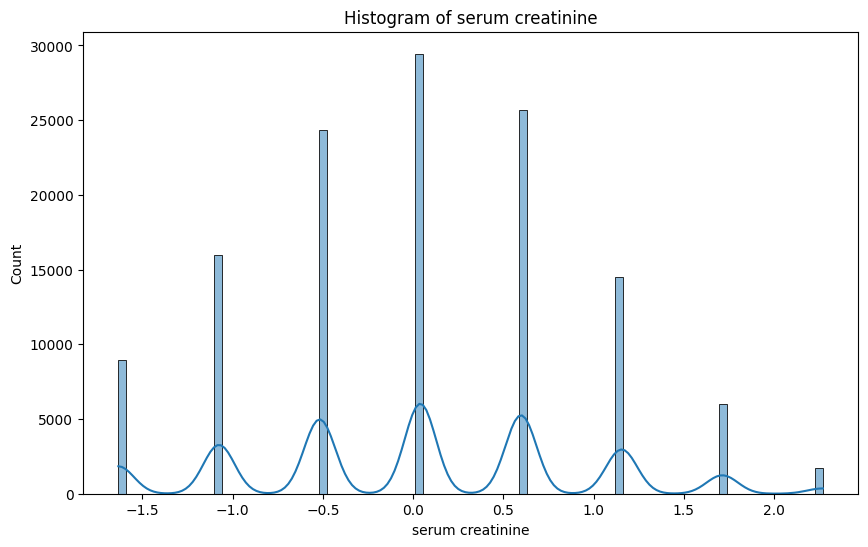

count    126591.000000
mean         -0.071382
std           0.978061
min          -2.052535
25%          -0.785883
50%          -0.363666
75%           0.480768
max           2.591854
Name: age, dtype: float64


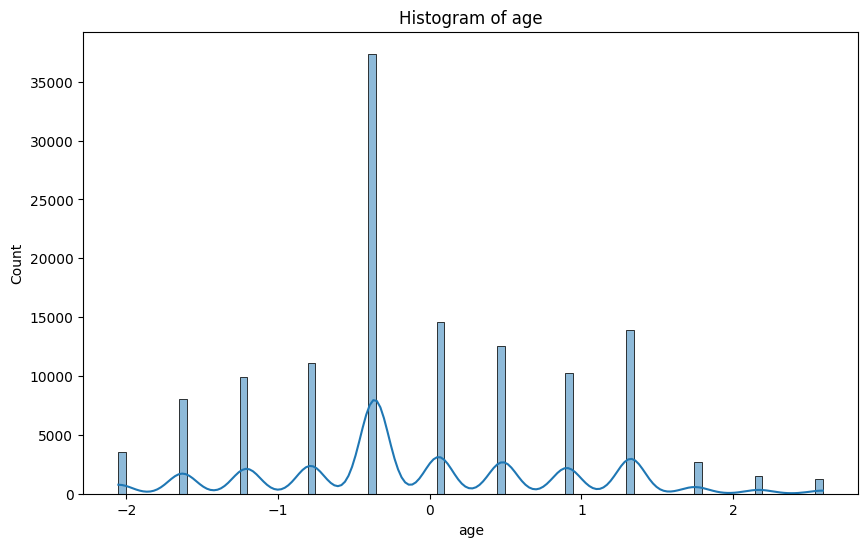

count    126591.000000
mean          0.054242
std           0.956111
min          -1.731152
25%          -0.597229
50%          -0.030268
75%           0.536694
max           2.237578
Name: height(cm), dtype: float64


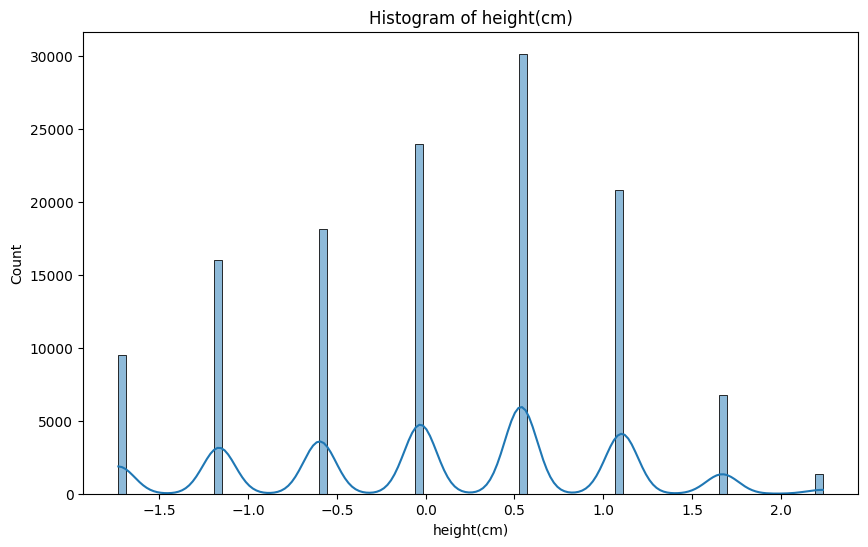

count    126591.000000
mean         -0.072438
std           0.900304
min          -1.807195
25%          -0.794939
50%          -0.235932
75%           0.504375
max           2.543995
Name: triglyceride, dtype: float64


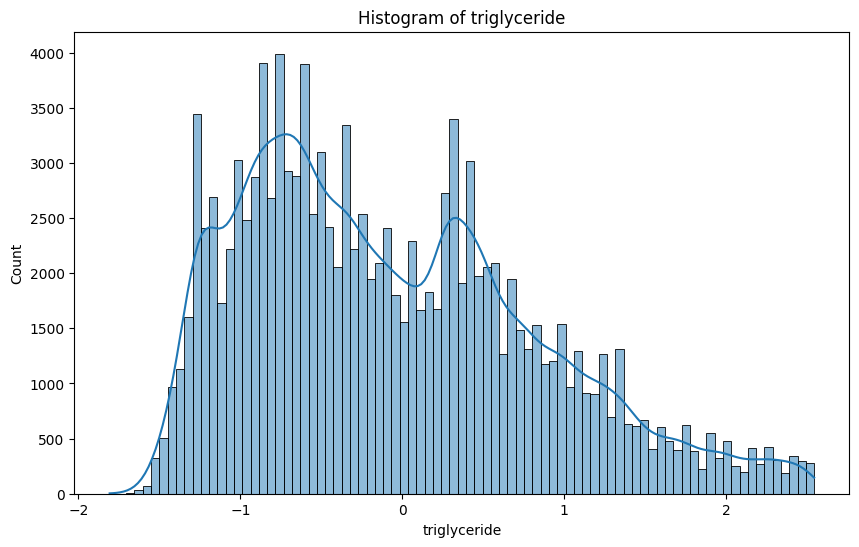

0    101362
1     25229
Name: dental caries, dtype: int64


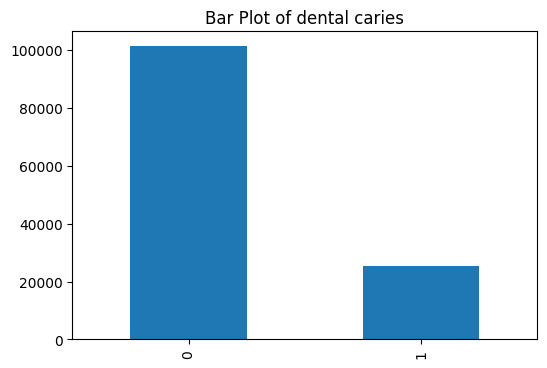

In [13]:
# For continues variables
numerical_features=['systolic','fasting blood sugar','AST','Gtp','hemoglobin','serum creatinine','age','height(cm)','triglyceride']

for var in numerical_features:

  print(df_no_outliers2[var].describe())

  # Histogram
  plt.figure(figsize=(10, 6))
  sns.histplot(df_no_outliers2[var], kde=True)
  plt.title('Histogram of {}'.format(var))
  plt.show()

# For categorical variable
categorical_features = 'dental caries'
print(df_no_outliers2[categorical_features].value_counts())

# Bar chart
plt.figure(figsize=(6, 4))
df_no_outliers2[categorical_features].value_counts().plot(kind='bar', stacked=True)
plt.title('Bar Plot of {}'.format(categorical_features))
plt.show()


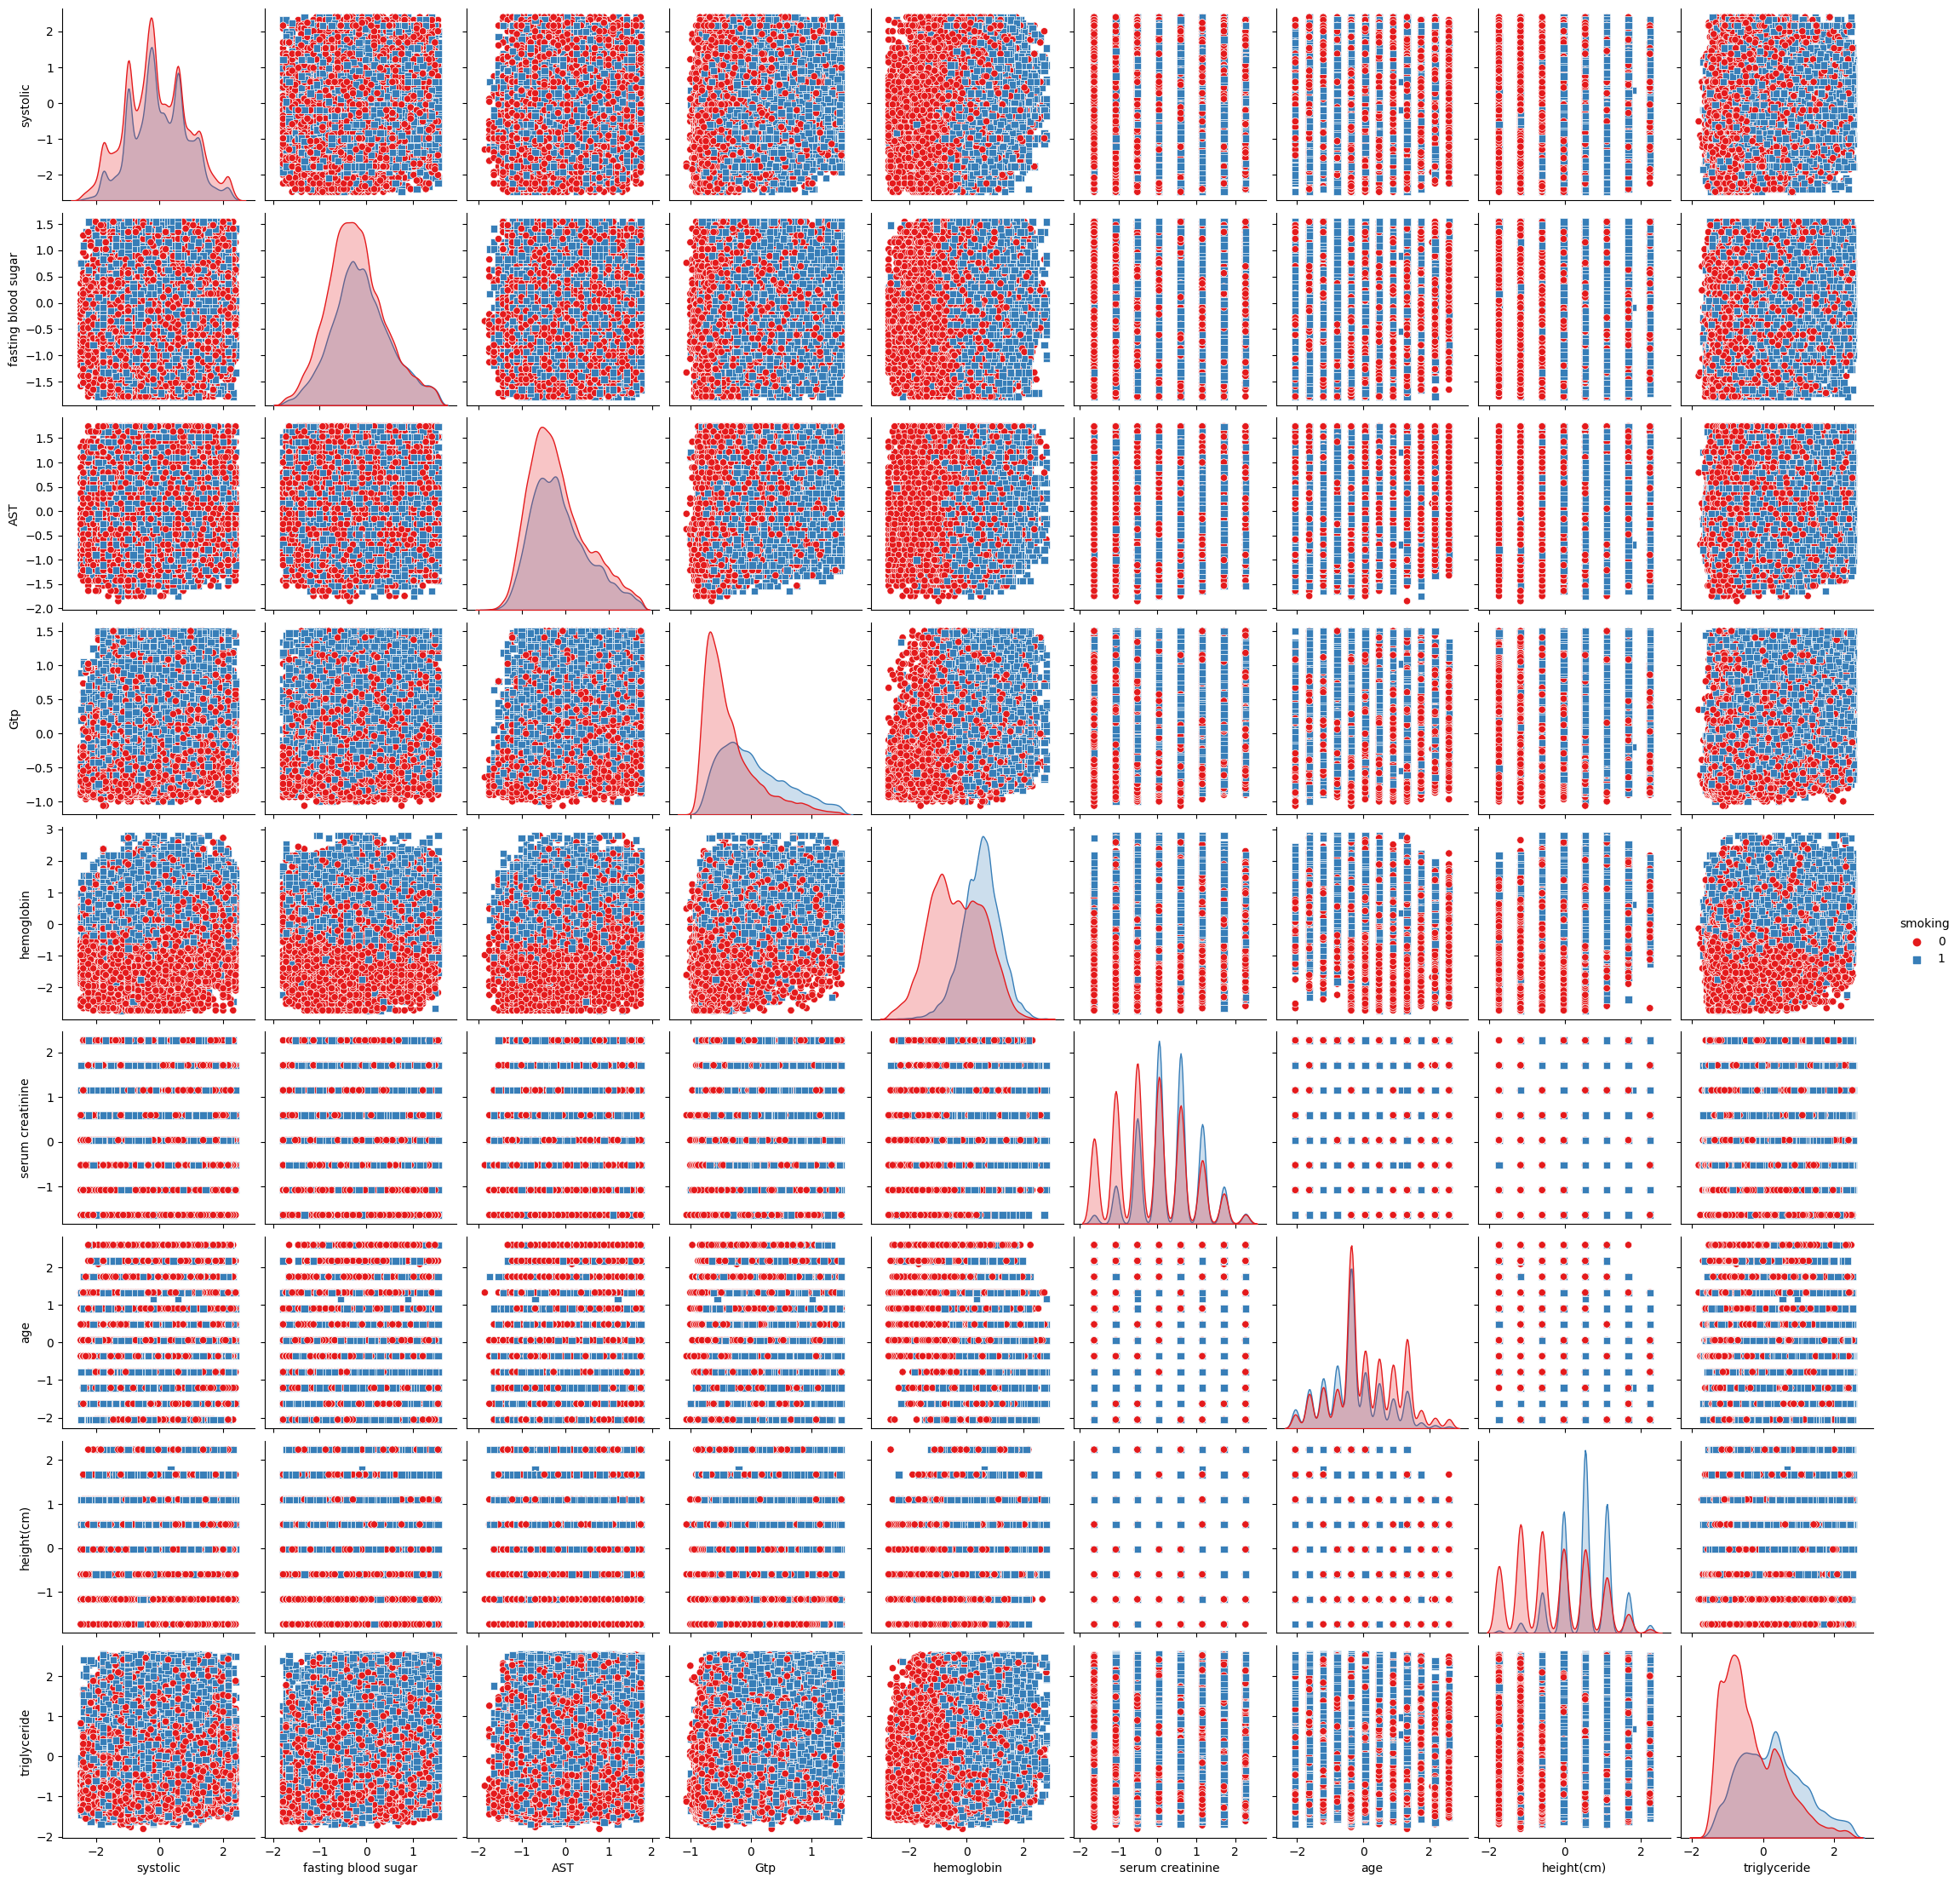

In [15]:
# Pairplot for numerical features
sns.pairplot(df_no_outliers2, hue='smoking', palette='Set1', markers=["o", "s"], vars=numerical_features)
plt.show()